In [1]:
import keras
keras.__version__

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.0'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.1104 - acc: 0.9615 - val_loss: 0.3598 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.4843 - acc: 0.8455 - val_loss: 0.4876 - val_acc: 0.8280
Epoch 3/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4663 - val_acc: 0.8497
Epoch 4/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.4077 - acc: 0.9154 - val_loss: 0.4526 - val_acc: 0.8663
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.3832 - acc: 0.9306 - val_loss: 0.4513 - val_acc: 0.8620
Epoch 6/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.3620 - acc: 0.9415 - val_loss: 0.4424 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.3425 - acc: 0.9515 - val_loss: 0.4489 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [8]:
import matplotlib.pyplot as plt

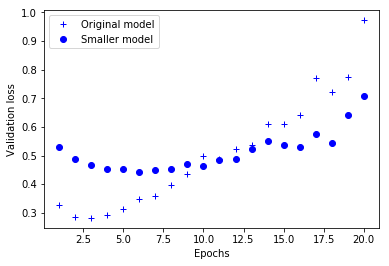

In [9]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.4630 - acc: 0.7954 - val_loss: 0.2848 - val_acc: 0.8882
Epoch 2/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2237 - acc: 0.9120 - val_loss: 0.3167 - val_acc: 0.8684
Epoch 3/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.1390 - acc: 0.9505 - val_loss: 0.3147 - val_acc: 0.8809
Epoch 4/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.0730 - acc: 0.9802 - val_loss: 0.4304 - val_acc: 0.8804
Epoch 5/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.0782 - acc: 0.9866 - val_loss: 0.4850 - val_acc: 0.8816
Epoch 6/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.0758 - acc: 0.9877 - val_loss: 0.4864 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.6210 - 

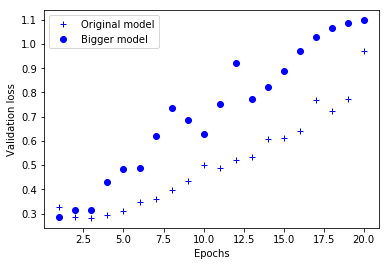

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

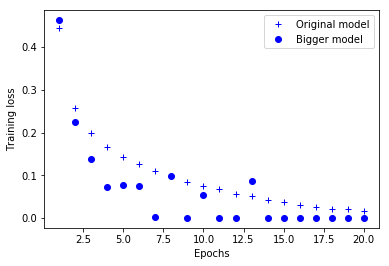

In [19]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [15]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [17]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 157us/step - loss: 0.4879 - acc: 0.8152 - val_loss: 0.3895 - val_acc: 0.8656
Epoch 2/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.3100 - acc: 0.9061 - val_loss: 0.3306 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.2657 - acc: 0.9202 - val_loss: 0.3301 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2459 - acc: 0.9286 - val_loss: 0.3413 - val_acc: 0.8821
Epoch 5/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2323 - acc: 0.9352 - val_loss: 0.3818 - val_acc: 0.8685
Epoch 6/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2237 - acc: 0.9390 - val_loss: 0.3676 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.2173 - acc: 0.9409 - val_loss: 0.3748 - 

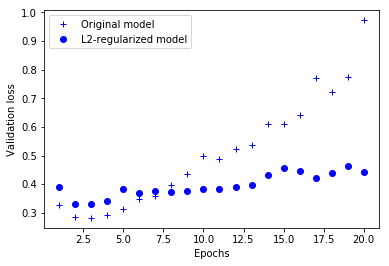

In [18]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

```python
from keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)
```

```python
layers_output *= np.randint(0, high=2, size=layers_output.shape)
```

```python
layer_output *= 0.5
```

```python
layer_output *= np.randint(0, high=2, size=layers_output.shape)
layer_output /= 0.5
```

```python
model.add(layers.Dropout(0.5))
```

In [23]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [25]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.5906 - acc: 0.6839 - val_loss: 0.4324 - val_acc: 0.8620
Epoch 2/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.4359 - acc: 0.8186 - val_loss: 0.3475 - val_acc: 0.8706
Epoch 3/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.3469 - acc: 0.8714 - val_loss: 0.2912 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.2881 - acc: 0.8983 - val_loss: 0.2765 - val_acc: 0.8884
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.2531 - acc: 0.9136 - val_loss: 0.2802 - val_acc: 0.8884
Epoch 6/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2218 - acc: 0.9266 - val_loss: 0.2886 - val_acc: 0.8874
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.1967 - acc: 0.9356 - val_loss: 0.3197 - 

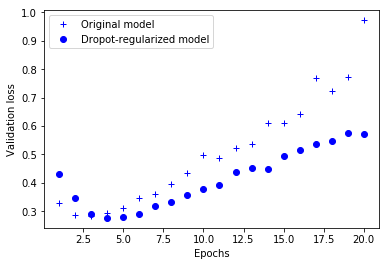

In [26]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropot-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()